In [ ]:
# load required library
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

def load_dataset():
    '''
    ** Do not modify this function. **
    Load diabetes dataset. We only use one feature and 60 instances.
    '''

    X, y = load_diabetes(return_X_y=True)
    return X[:60, 2], y[:60]

In [ ]:
def plot_data(X, y):
    '''
    Draw scatter plot using raw data.
    '''
    #########################################################################
    # Full Mark: 10                                                         #
    # TODO:                                                                 #
    # 1. make a scatter plot of the raw data                                #
    # 2. set title for the plot                                             #
    # 3. set label for X,y axis                                             #
    # e.g.,                                                                 #
    #https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.scatter.html#
    #########################################################################
    plt.scatter(X,y)
    plt.title("Dataset")
    plt.xlabel("Normalized BMI")
    plt.ylabel("Target")
    plt.grid()


    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # return the plt object
    return plt

In [ ]:

def train_test_split(X, y):
    '''
    Randomly split data into train and test set.
    Two thirds of the raw data will be the train set and one third of the raw data will be the test set.
    '''
    ######################################################################################
    # Full Mark: 10                                                                      #
    # TODO:                                                                              #
    # 1. shuffle the indices of data first.                                              #
    # (Hint: use numpy.arange and numpy.random.shuffle)                                  #
    # 2. select two thirds of the data as train set, the rest of data as test set.       #
    ######################################################################################
    length = len(X)
    # Transform the array in nparray
    xnp = np.array(X)
    ynp = np.array(y)
    # Shuffle the indices for x and y dataset
    s = np.arange(xnp.shape[0])
    np.random.shuffle(s)
    # Shuffle both dataset using the same index shuffled
    xnp = xnp[s]
    ynp = ynp[s]
    # Split the dataset in X_train, X_test, y_train, y_test
    X_test , y_test = xnp[:length//3] , ynp[:length//3] # xnp[:int(length/3)]
    X_train , y_train = xnp[length//3:] , ynp[length//3:]

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    
    return X_train, X_test, y_train, y_test


In [ ]:
def cost_function(weights, X, y):
    '''
    Define the cost function.
    '''

    #########################################################################
    # Full Mark: 25                                                         #
    # TODO:                                                                 #
    # Implement the Mean Square Error function:                             #
    # https://en.wikipedia.org/wiki/Mean_squared_error#Mean                 #
    #                                                                       #
    # (Hint: Use numpy functions)                                           #
    #########################################################################
    weights = np.array(weights)
    X = np.array(X)
    y = np.array(y)
    # Assuming no bias, Predicted value1 = w1 * X1
    Y_pred =[]
    for i in range(len(X)):
      a = X[i][0]*weights[0] + X[i][1]*weights[1]
      Y_pred.append(a)
    Y_pred = np.array(Y_pred)
    cost = np.square(np.subtract(y,Y_pred)).mean()

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # return cost
    return cost

In [ ]:
def gradient_descent(weights, X, y):
    '''
    Update weights using gradient descent algorithm.
    '''

    # define your learning_rate and epoch
    lr = 0.1
    epoch = 20000
    
    # define cost
    cost_list = []
    m = len(X)
    # for loop
    for it in range(epoch):
        #########################################################################
        # Full Mark: 25                                                         #
        # TODO:                                                                 #
        # 1. update weights with learning rate lr                               #
        # 2. append the updated cost to cost list                               #
        # (Hint: Use numpy functions)                                           #
        #########################################################################
        prediction = np.dot(X,weights)
        weights -= (2/m)*lr*(X.T.dot((prediction - y)))
        cost_list.append(cost_function(weights,X,y))
        #########################################################################
        #                       END OF YOUR CODE                                #
        #########################################################################
        
    # return updated weights and cost list
    return weights, cost_list

In [ ]:
def plot_iteration(cost, epoch=20000):
    '''
    Plot the cost for each iteration.
    '''

    #########################################################################
    # Full Mark: 10                                                         #
    # TODO:                                                                 #
    # 1. plot the cost for each iteration                                   #
    # 2. set title and labels for the plot                                  #
    # (Hint: Use plt.plot function to plot and range(n))                    #
    #########################################################################
    plt.plot(range(epoch),cost)
    plt.title("Visualizing cost function over epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    
    # show plot
    plt.show()

In [ ]:
def plot_final(weights, X, y):
    '''
    Draw the simple linear regression model.
    '''

    # draw the raw data first
    model_plot = plot_data(X, y)

    #########################################################################
    # Full Mark: 10                                                         #
    # TODO:                                                                 #
    # 1. create a series of x coordinates in proper range.                  #
    # (Hint: use numpy.arange)                                              #
    # 2. calculate y coordinates:                                           #
    #                         y = w * X + b                                 #
    # 3. plot the curve and set title                                       #
    #########################################################################
    plot_x = np.arange(min(X), max(X), 0.01)
    plot_y = (weights[1] * plot_x) + weights[0]
    plt.title("Linear regression model")
    plt.xlabel("Input")
    plt.ylabel("Outpu")
    model_plot.plot(plot_x, plot_y)


    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    model_plot.show()

In [ ]:
def print_test_error(weights, X, y_true):
    '''
    Use optimized weights to predict y, and print test error.
    '''

    #########################################################################
    # Full Mark: 10                                                         #
    # TODO:                                                                 #
    # 1. predict the target value y of X:                                   #
    #                            y = w * X + b                              #
    # 2. calculate the Mean Square Error using true y and predicted y       #
    #########################################################################
    predicted_y = (weights[1] * X) + weights[0]
    error = (1/len(X)) * np.sum(np.square(predicted_y - y_true))
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # print test error
    print("Test error: %.4f" % error)
    return error

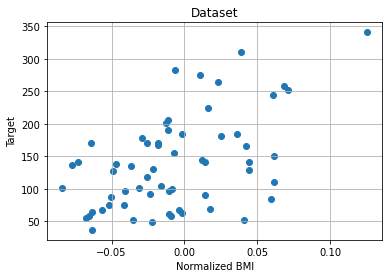

Initial cost: 27331.5302


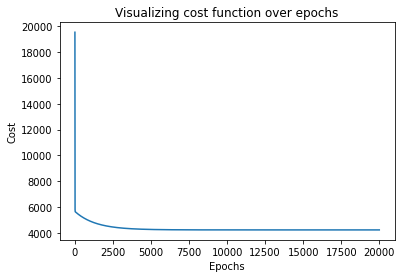

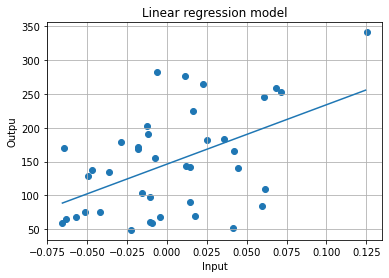

Test error: 2833.2109


In [ ]:
def main():
    '''
    ** Do not modify this function. **
    '''

    # Plot raw data points
    X, y = load_dataset()
    plot = plot_data(X, y)
    plot.show()

    # Split train and test set
    X = np.c_[np.ones(X.size), X]
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # initialize weight
    weights = np.ones(X_train.shape[1])

    # calculate training cost
    init_cost = cost_function(weights, X_train, y_train)
    print("Initial cost: %.4f" % init_cost)

    # gradient descent to find the optimal fit
    weights, cost_list = gradient_descent(weights, X_train, y_train)

    # draw the cost change for iterations
    plot_iteration(cost_list)

    # draw the final linear model
    # it is shown as a red line, you can change the color anyway
    plot_final(weights, X_train[:, 1], y_train)

    # Print test error
    print_test_error(weights, X_test[:, 1], y_test)


if __name__ == '__main__':
    main()